In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import sklearn.cluster as cluster
import time
from scipy import stats
import warnings
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
! pip install fuzzy-c-means
from fcmeans import FCM
from sklearn.decomposition import PCA
import plotly.express as px
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


Here for the purpose of starting analyzing the data, firstly we have imported various libraries, like pandas, numpy, matplotlib, sklearn normalizer etc. 

In [6]:
data = pd.read_csv('wine-clustering.csv')

Here we have read the CSV file of wine clustering that was assigned in this assignment for analyzing. We have read the file in data variable.

In [7]:
flights = sns.load_dataset("flights")

In [8]:
flights.pivot("month", "year", "passengers")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


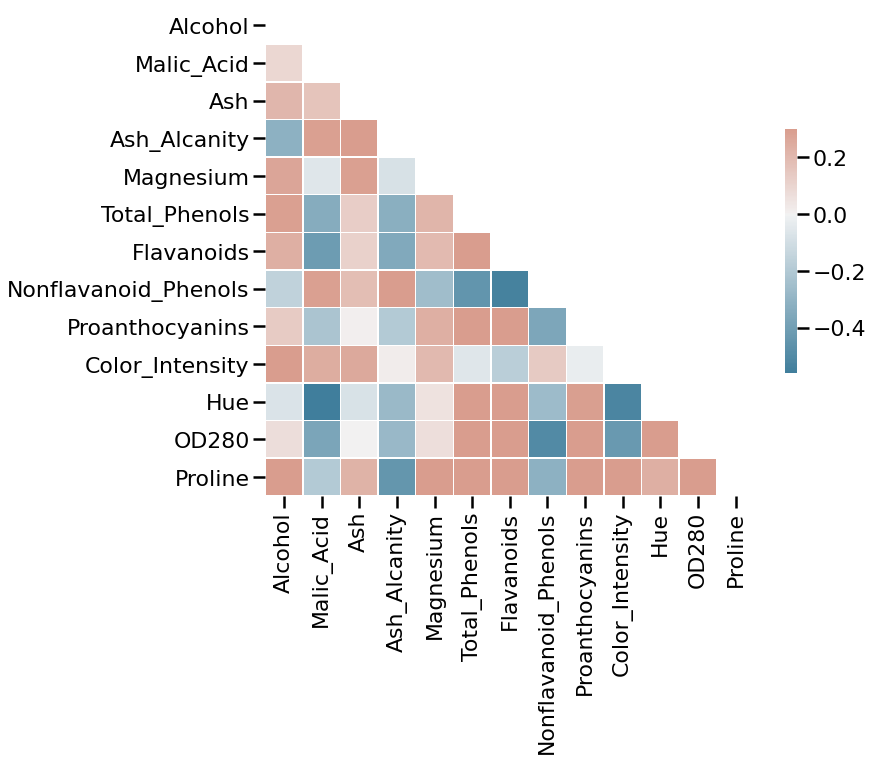

In [9]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Here we have started our analysis with the creation of a scatter plot. We initiall have set up the matplotlib figure and have defined the defined the figure size. Then with the help of diverging palette we generated a custom diverging colormap. Then we crated a heatmap with the mask and correct aspect ratio. The heatmap was formed for all the variable with each other. From the heat ap we were able to analyze that there were some variable which had a positive correlation and some that have a negative correlation. <br> 
Scatter plot is used when we have two variables that pair well together. But, a heatmap of correlation is a better way to check if two features are correlated on not. It is more rich in terms of information than scatter plot.

In [10]:
data_without_outlier = data[(np.abs(stats.zscore(data)) < 2).all(axis=1)]

Here we have created a variable that contained the rule for identifying and removing the outliers.

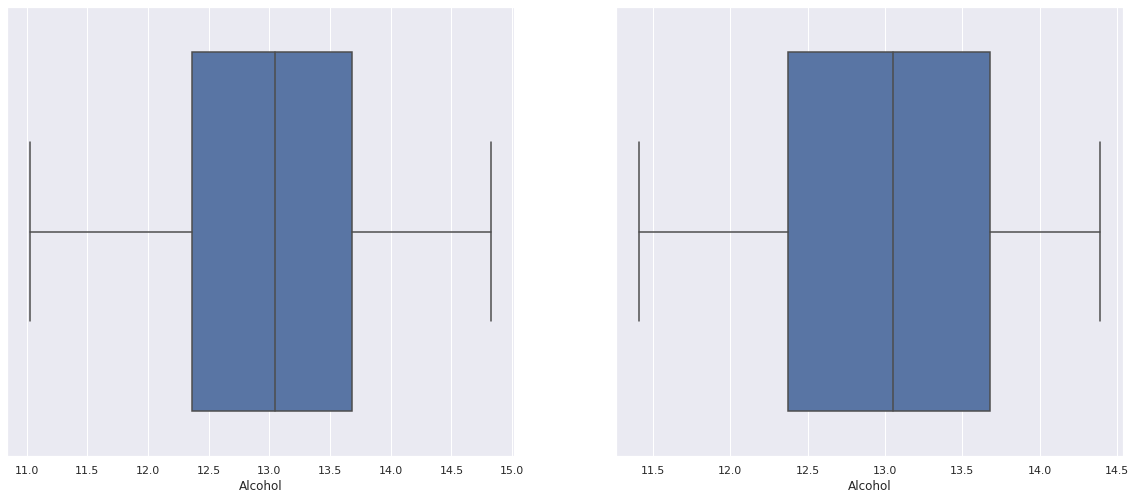

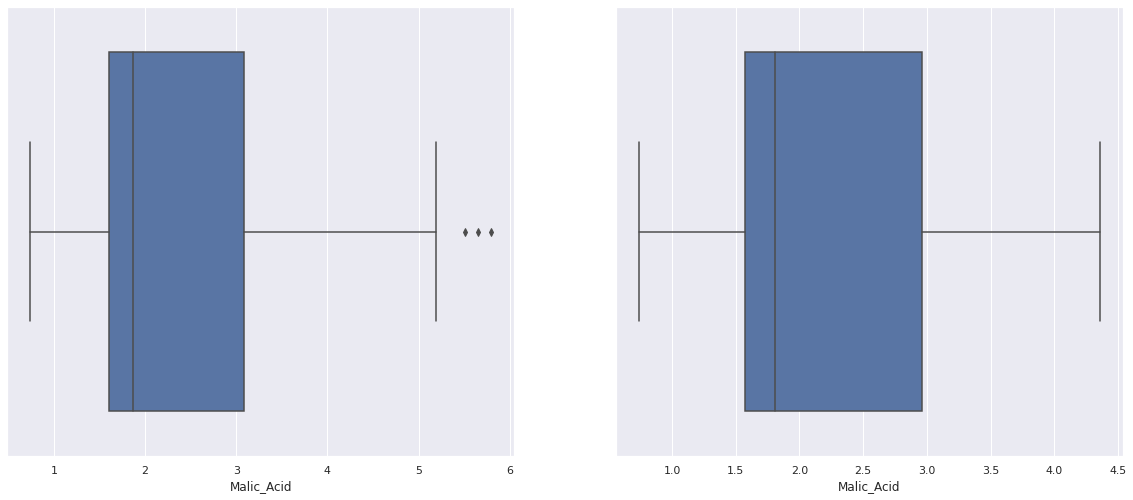

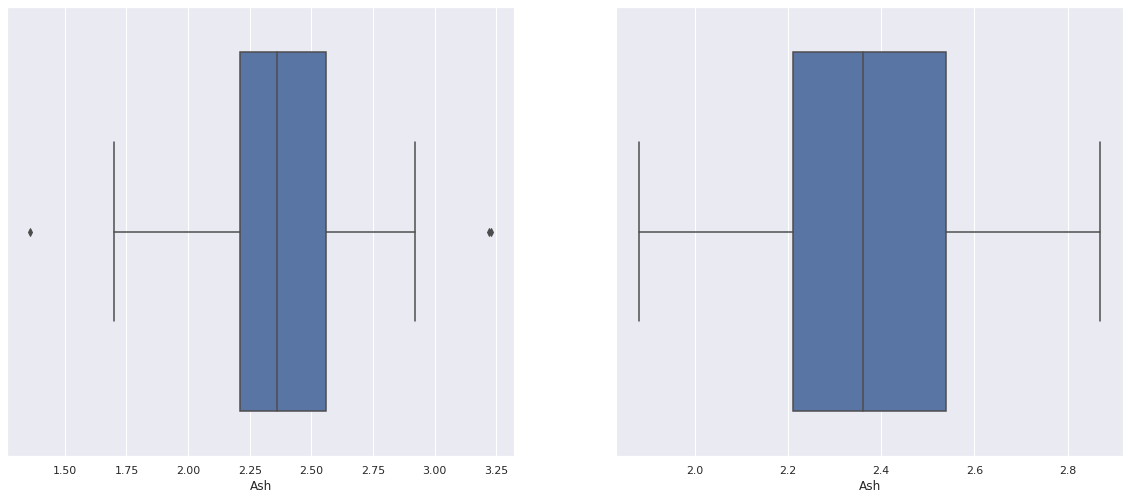

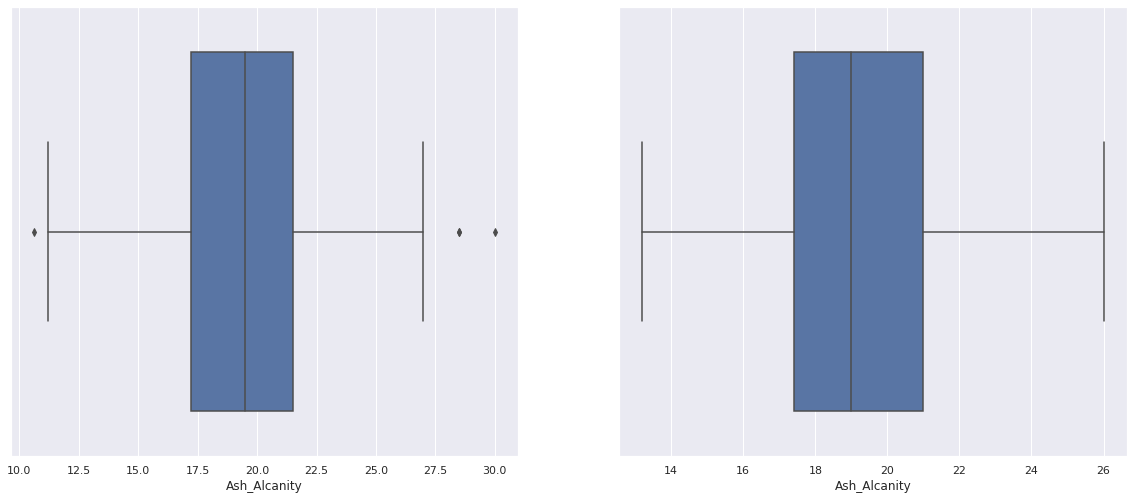

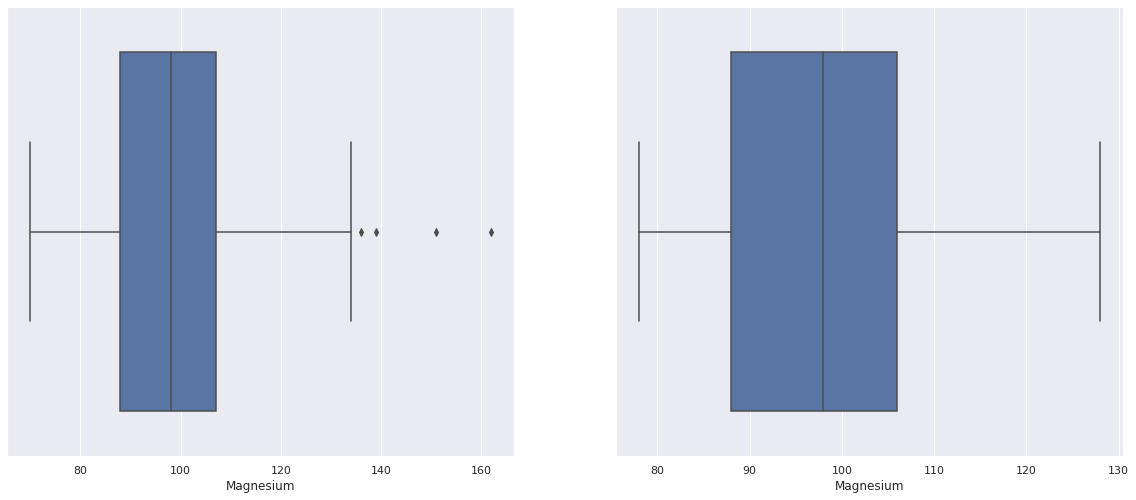

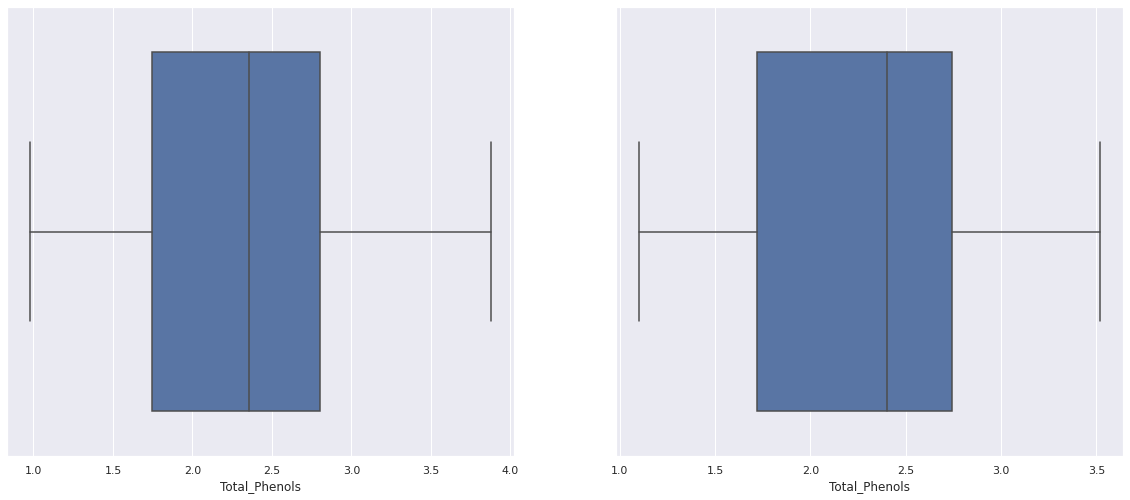

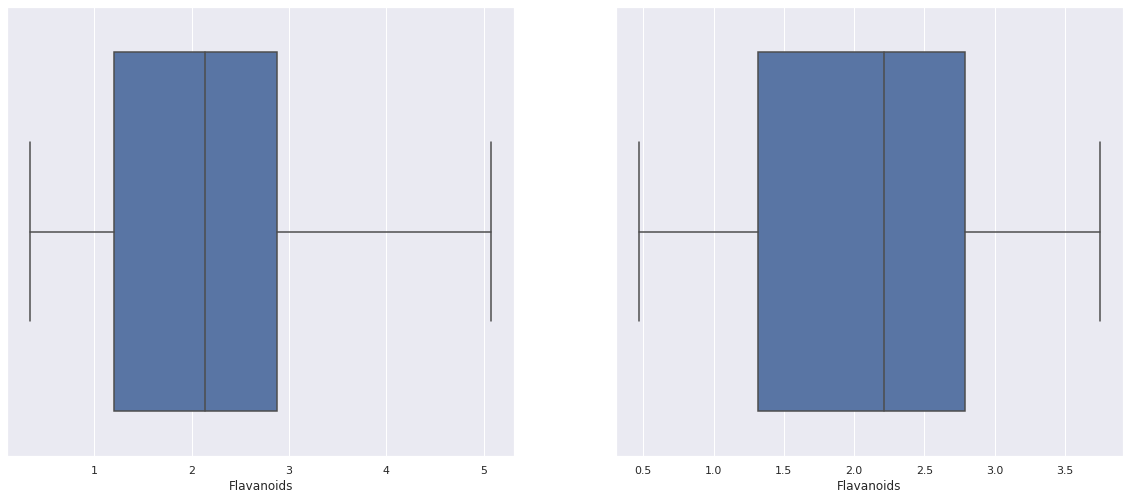

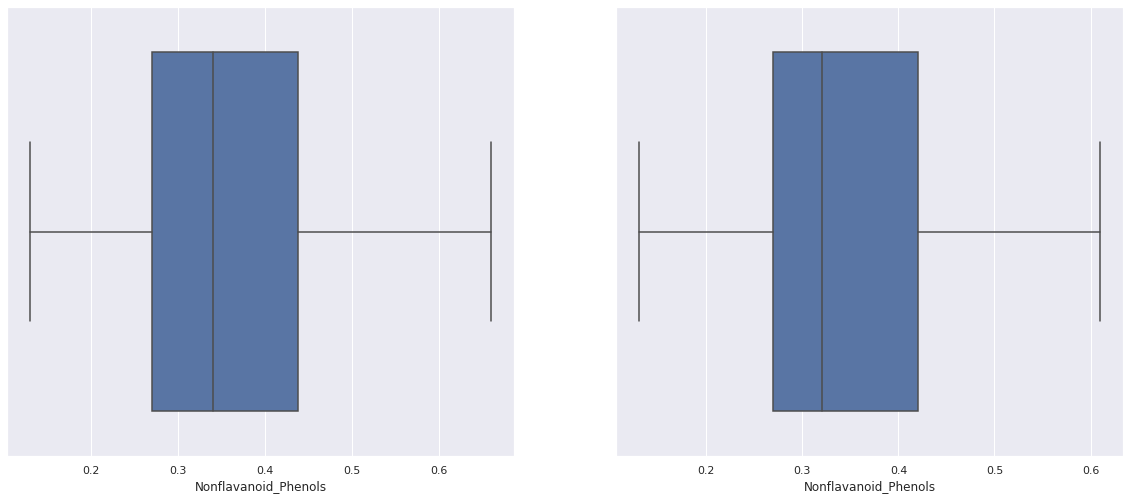

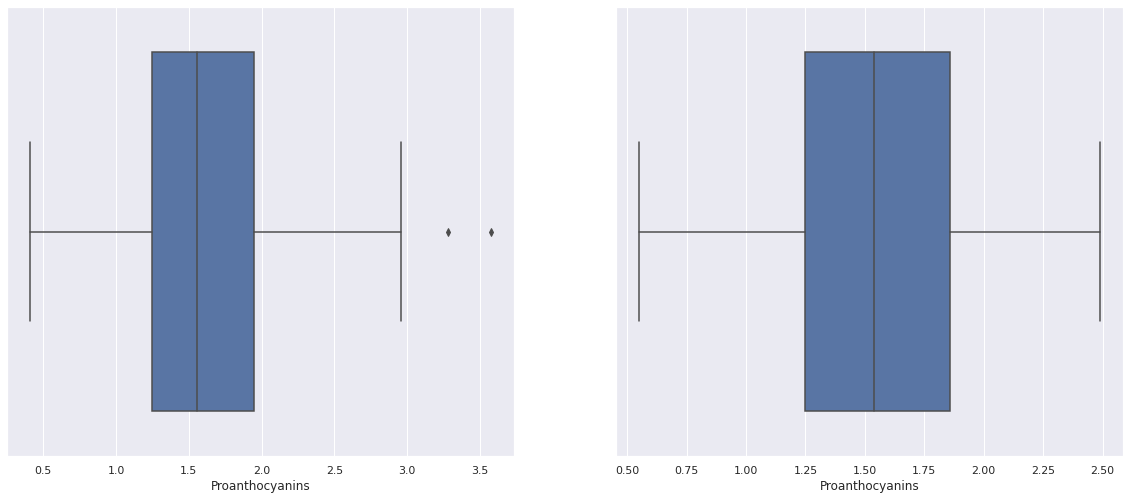

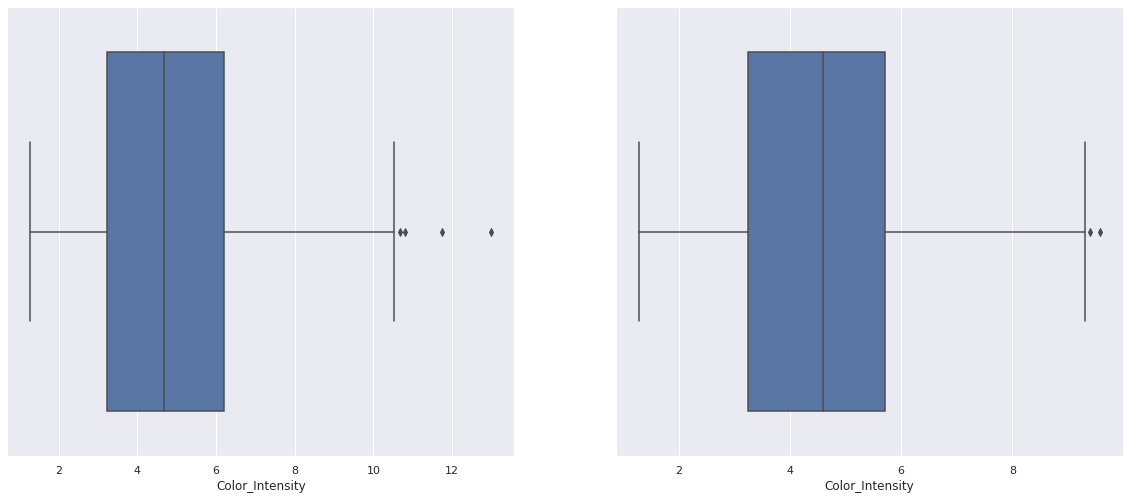

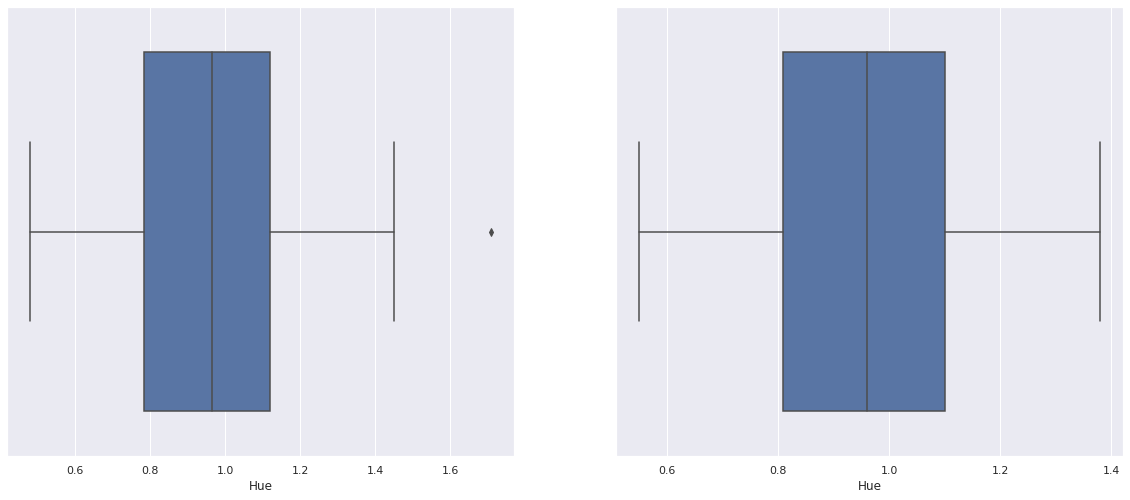

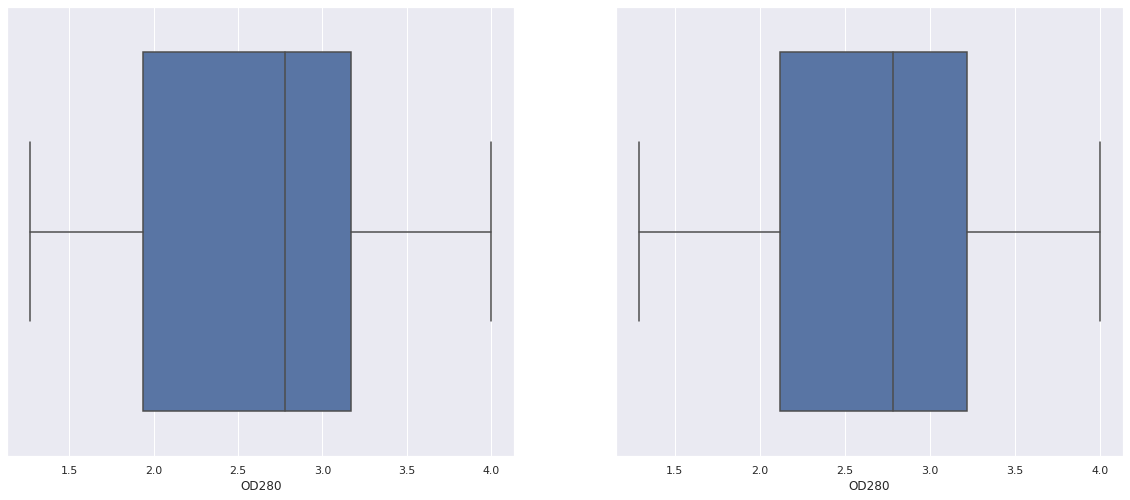

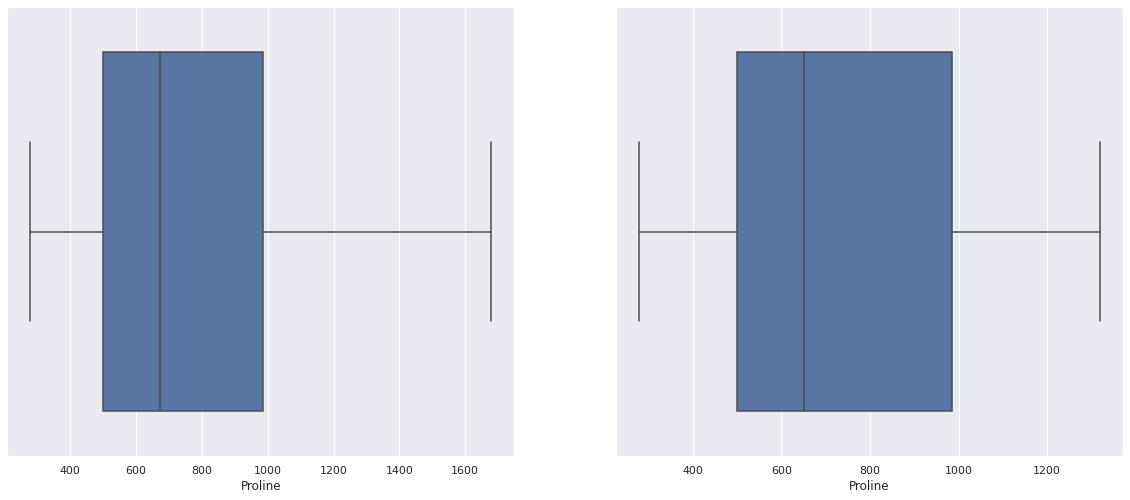

In [11]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,8.27)})
for column in data.columns:
    
    fig, ax =plt.subplots(1,2)
    sns.boxplot(data[column],ax=ax[0],palette="deep")
    sns.boxplot(data_without_outlier[column], ax=ax[1], palette="deep")
    fig.show()

After defining the z score for removing the outliers, we move forward to actually remove them from the dataset. All the box plots in the first column represents the original data and the boxplots in the second column represents the new data we have after removing the outliers using Z score.  

In [12]:
# Here is the code to plot clustered data
def plot_clusters(data, algorithm, args, kwds):
    labels = cluster.KMeans(n_clusters=3, init='k-means++', n_init=15, max_iter=500, random_state=17).fit_predict(data_cluster)
    data_cluster['labels']  = pd.Series(labels, index=data_cluster.index)
    sns.scatterplot(data=data_cluster, x="total_bill", y="tip", hue="day", style="time")

Here we have defind a function, named plot_cluster that takes data, algorithm, args, kwds as input from the user. We have used K-Means clustering here which will help to create a scatter plot in the end.

In [13]:
std_scaler = StandardScaler()
data_cluster=data_without_outlier.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_without_outlier)

In [14]:
time_taken = dict()

100%|██████████| 8/8 [00:00<00:00, 12.25it/s]


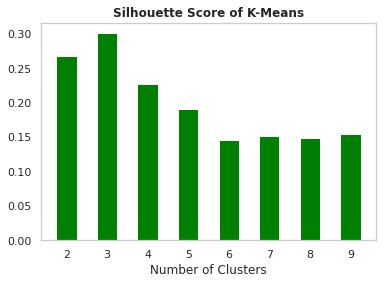

In [43]:
# k means
start = time.process_time()
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'green',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of K-Means',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken['k-means'] = time.process_time() - start

Here we have created a Silhouette Score of K-Means, where X axis represents the Number of Clusters. From here we were able to analyze that the score was highest in 3rd cluster.  

100%|██████████| 8/8 [00:00<00:00,  9.13it/s]


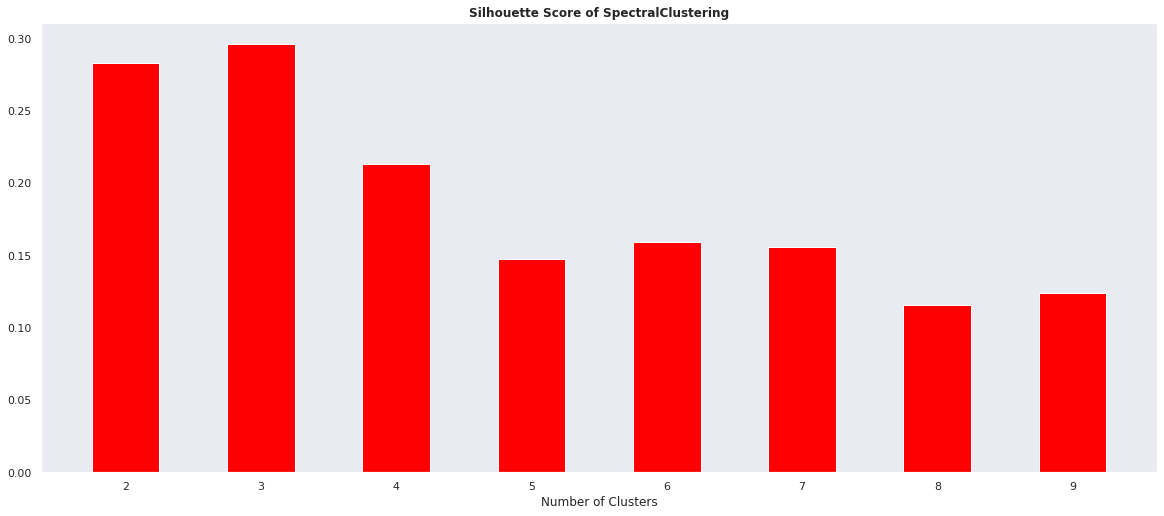

In [16]:
# spectral clustering
start = time.process_time()

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.SpectralClustering(n_clusters=i, n_init=15, random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of SpectralClustering',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken['SpectralClustering'] = time.process_time() - start

100%|██████████| 8/8 [00:00<00:00, 12.08it/s]


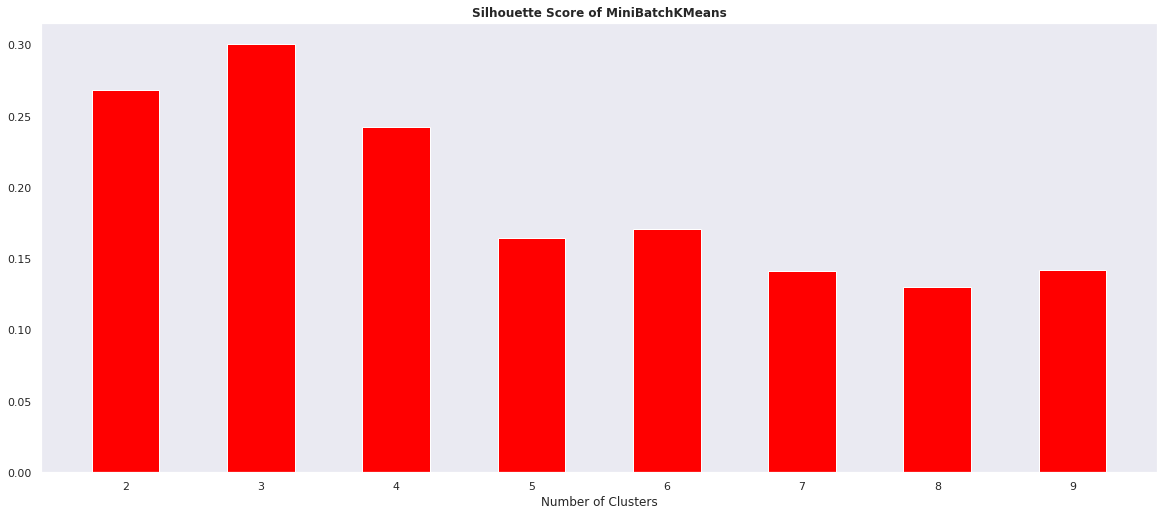

In [17]:
start = time.process_time()
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.MiniBatchKMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of MiniBatchKMeans',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken['MiniBatchKMeans'] = time.process_time() - start

Now, we have created a Silhouette Score of MiniBatchKMeans, where in the chart X axis contains the Number of Clusters. Here also we were able to see that the the kmeans score was highest in the 3rd cluster. 

100%|██████████| 8/8 [00:04<00:00,  1.65it/s]


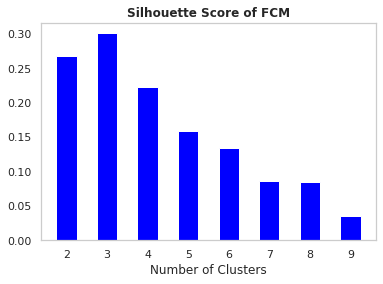

In [42]:
start = time.process_time()
silhouette = {}
for i in tqdm(range(2,10)):
    fcm = FCM(n_clusters=i)
    fcm.fit(data_cluster.values)
    silhouette[i] = silhouette_score(data_cluster, fcm.predict(data_cluster.values), metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of FCM',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken['FCM'] = time.process_time() - start

100%|██████████| 8/8 [00:00<00:00,  8.57it/s]


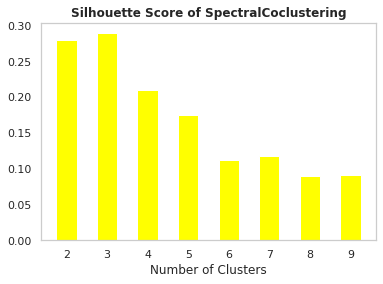

In [41]:
start = time.process_time()
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.SpectralCoclustering(n_clusters=i, init='k-means++', n_init=15, random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.row_labels_, metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'yellow',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of SpectralCoclustering',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken['SpectralCoclustering'] = time.process_time() - start

Now, we created a barchart of silhouette score of SpectralCoclustering, keeping Number of Clusters in the X axis of the chart. Here also we were able to analyze that the score was highest in the 3rd cluster.

Hence, we were able to conclue that 3 is good.

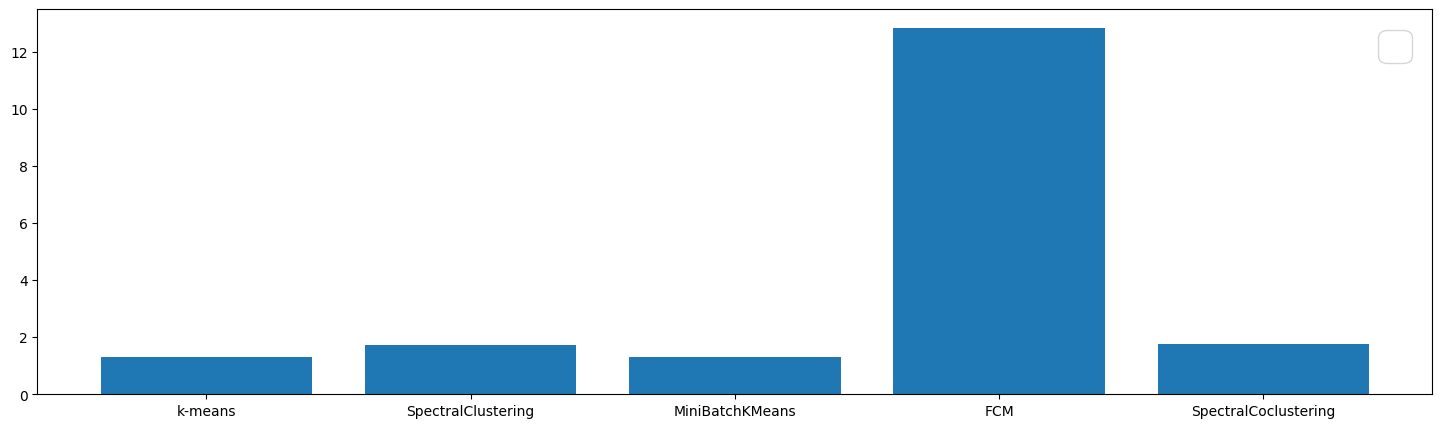

In [20]:
matplotlib.rcdefaults() 
sns.set_color_codes()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(time_taken.keys()), list(time_taken.values()))
ax.legend(fontsize = 30)
plt.show()
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

Here, we have created a barchart, in terms of the performance, we are abe to see that K-means is the lowest and FCM is the highest. Through which we can conclude that FCM performs better as compared to the other algorithms.

In order to find, why FCM is better, we have used PCA for analyzing the time taken by each alogrithm with PCA and without PCA.

In [21]:
pca = PCA(3)
pca_result = pca.fit_transform(data_cluster)

In [22]:
time_taken_with_pca = dict()

100%|██████████| 8/8 [00:00<00:00, 12.55it/s]


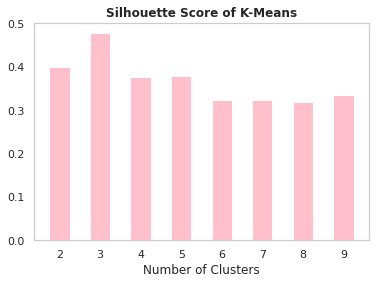

In [40]:
# k means
start = time.process_time()
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_result)
    silhouette[i] = silhouette_score(pca_result, kmeans.labels_, metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'pink',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of K-Means',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken_with_pca['KMeans'] = time.process_time() - start

100%|██████████| 8/8 [00:01<00:00,  7.84it/s]


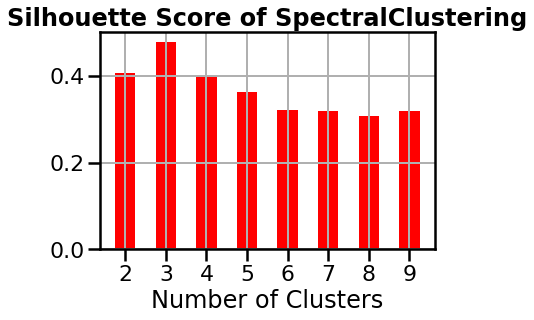

In [26]:
labels = cluster.SpectralClustering(n_clusters=3, n_init=15, random_state=17).fit_predict(pca_result)
pca_result_v = pd.DataFrame({'feature_1': pca_result[:, 0], 'feature_2': pca_result[:, 1], 'feature_3': pca_result[:, 2]})
pca_result_v['labels']  = pd.Series(labels, index=pca_result_v.index)
fig = px.scatter_3d(pca_result_v, x='feature_1', y='feature_2', z='feature_3',
              color='labels')
fig.show()

100%|██████████| 8/8 [00:00<00:00, 11.99it/s]


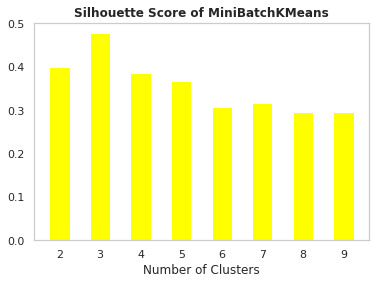

In [39]:
start = time.process_time()
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.MiniBatchKMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_result)
    silhouette[i] = silhouette_score(pca_result, kmeans.labels_, metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'yellow',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of MiniBatchKMeans',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken_with_pca['MiniBatchKMeans'] = time.process_time() - start

In [44]:
labels = cluster.MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=15, max_iter=500, random_state=17).fit_predict(pca_result)
pca_result_v = pd.DataFrame({'feature_1': pca_result[:, 0], 'feature_2': pca_result[:, 1], 'feature_3': pca_result[:, 2]})
pca_result_v['labels']  = pd.Series(labels, index=pca_result_v.index)
fig = px.scatter_3d(pca_result_v, x='feature_1', y='feature_2', z='feature_3',
              color='labels')
fig.show()

100%|██████████| 8/8 [00:03<00:00,  2.21it/s]


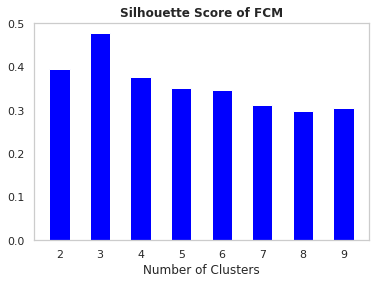

In [38]:
start = time.process_time()

silhouette = {}
for i in tqdm(range(2,10)):
    fcm = FCM(n_clusters=i)
    fcm.fit(pca_result)
    silhouette[i] = silhouette_score(pca_result, fcm.predict(pca_result), metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of FCM',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken_with_pca['FCM'] = time.process_time() - start

In [30]:
fcm = FCM(n_clusters=3)
fcm.fit(pca_result)
labels = fcm.predict(pca_result)
pca_result_v = pd.DataFrame({'feature_1': pca_result[:, 0], 'feature_2': pca_result[:, 1], 'feature_3': pca_result[:, 2]})
pca_result_v['labels']  = pd.Series(labels, index=pca_result_v.index)
fig = px.scatter_3d(pca_result_v, x='feature_1', y='feature_2', z='feature_3',
              color='labels')
fig.show()

100%|██████████| 8/8 [00:00<00:00,  8.09it/s]


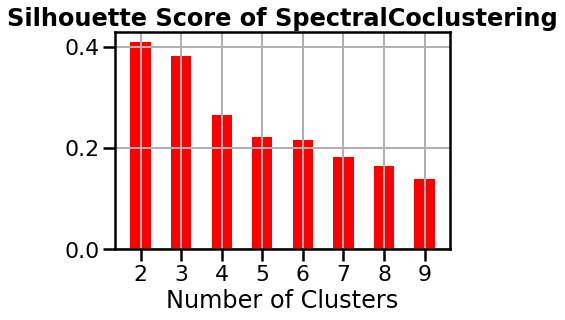

In [31]:
start = time.process_time()

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.SpectralCoclustering(n_clusters=i, init='k-means++', n_init=15, random_state=17)
    kmeans.fit(pca_result)
    silhouette[i] = silhouette_score(pca_result, kmeans.row_labels_, metric='euclidean')
    
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score of SpectralCoclustering',fontweight='bold')
plt.xlabel('Number of Clusters')
time_taken_with_pca['SpectralCoclustering'] = time.process_time() - start

In [32]:
scc = cluster.SpectralCoclustering(n_clusters=2, init='k-means++', n_init=15, random_state=17)
scc.fit(pca_result)
labels = scc.row_labels_
pca_result_v = pd.DataFrame({'feature_1': pca_result[:, 0], 'feature_2': pca_result[:, 1], 'feature_3': pca_result[:, 2]})
pca_result_v['labels']  = pd.Series(labels, index=pca_result_v.index)
fig = px.scatter_3d(pca_result_v, x='feature_1', y='feature_2', z='feature_3',
              color='labels')
fig.show()

In [33]:
time_taken_with_pca, time_taken

({'FCM': 6.058221351,
  'KMeans': 1.3106149290000033,
  'MiniBatchKMeans': 1.3527271380000059,
  'SpectralClustering': 1.9861286149999984,
  'SpectralCoclustering': 1.8893764020000035},
 {'FCM': 12.838427524,
  'MiniBatchKMeans': 1.3183658399999985,
  'SpectralClustering': 1.738092988,
  'SpectralCoclustering': 1.762471269999999,
  'k-means': 1.3132442609999995})

After implementing PCA, on all the algorithms, we have calculated the time taken by each algorithm, with PCA and without PCA. In order to find why a certin algorithm is performing well as compared to another.

In [34]:
time_analysis = np.array([[i[0], i[1][0], i[1][1]] for i in zip(time_taken.keys(), zip(time_taken.values(), time_taken_with_pca.values()))])
time_analysis = pd.DataFrame({'Algorithm': time_analysis[:, 0], 'without_pca': time_analysis[:, 1], 'with_pca': time_analysis[:, 2]})
time_analysis = pd.melt(time_analysis, id_vars=['Algorithm'], value_vars=['without_pca', 'with_pca'])
time_analysis['value'] = time_analysis['value'].astype('float')

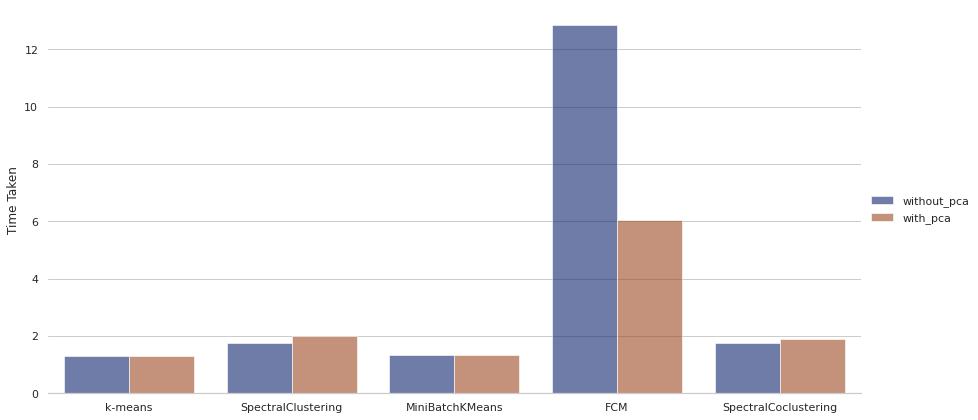

In [35]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=time_analysis, kind="bar",
    x="Algorithm", y="value", hue="variable",
    ci="sd", palette="dark", alpha=.6, height=6, aspect = 2
)
g.despine(left=True)
g.set_axis_labels("", "Time Taken")
g.legend.set_title("")

Here we have drawn a  multiple barplot of Kmeans, Specteral Clustering, MiniBatch Kmeans, FCM and Spectral Clustering. The brown bar represents, the tike taken by the algorithm with using PCA and the blue bars represents the time taken by the algorithms without PCA.<br>
From the brown bars, we were able to analyze, that Kmeans is the only algorithm that has taken more time with PCA as compared to without PCA. The highest time taken was by FCM which contained PCA.<br>
